# Vectorisation



L'objectif de la vectorisation est de transformer les documents en vecteurs. Il existe deux approches principales : 
1. L'approche sac de mots dans laquelle il n'y a aucun ordre dans les termes utilisés et qui ne tient compte que du nombre d'occurrences des termes
1. l'approche basée sur TF_IDF qui ne tient pas non plus compte de l'ordre des termes mais qui pondère les valeurs grâce à TF_IDF au lieu de la fréquence des termes.

**Remarque :** même si l'ordre des mots n'est pas pris en compte dans ces approches, les n-grammes peuvent partiellement servir à pallier ce problème. 

In [2]:
import nltk

## Bag of words

La manière la plus simple de mettre sous la forme de vecteur (*vectorisation*) est d'utiliser les Bag of Words (BOW). Il s'agit, à partir d'une liste de mots (vocabulaire) de compter le nombre d'apparitions du mot du vocabulaire dans le document.  

Cette opération se fait par :
1. Création d'une instance de la classe CountVectorizer.
1. Appel de la fonction fit() pour apprendre le vocabulaire.
1. Appel de la fonction transform() sur un ou plusieurs documents afin de les encoder dans le vecteur.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas as pd
import seaborn as sns

Les principaux paramètres utiles sont les suivants :  
1. **lowercase** booléen pour mettre en minuscule le document (défaut=True).
1. **token_pattern** pour éliminer des mots trop petits (défaut=None).
1. **stopwords** pour éliminer les stopwords du document (défaut=None).
1. **analyzer** pour préciser si l'on travaille avec des mots ou des caractères ou appliquer une fonction de pré-traitement (défaut=’word’).
1. **ngram_range** pour pouvoir utiliser des n-grammes de mots ou de caractères en fonction de la valeur d'*analyzer* (défaut=(1, 1), i.e. on ne considère qu'un mot).
1. **max_df** pour ignorer les termes qui ont une fréquence de document strictement supérieure à un seuil donné (termes trop fréquents) (défaut=1.0).
1. **min_df** pour ignorer les termes qui ont une fréquence de document (présence en % de documents) strictement inférieure à un seuil donné (termes peu fréquents) (défaut=1).
1. **max_features** pour limiter le nombre de caractéristiques (*features*) que le vecteur doit contenir (défaut : None).


In [12]:
texte = ["This is an example, ! of CountVectorizer for creating a vector",
        "This is another example of CountVectorizer",
        "with or without parameters"]

# par defaut conversion en minuscule
vectorizer = CountVectorizer(lowercase=False)

# creation du vocabulaire
# et encodage du document
vector = vectorizer.fit_transform(texte)
# la liste des différents features
print ("Les différents features sont",vectorizer.get_feature_names())

# Contenu du vocabulaire
print ("Vocabulaire : ")
print(vectorizer.vocabulary_)


# affichage de la taille du vecteur de sortie

print ("\nTaille du vecteur :\n",vector.shape,'\n')

Les différents features sont ['CountVectorizer', 'This', 'an', 'another', 'creating', 'example', 'for', 'is', 'of', 'or', 'parameters', 'vector', 'with', 'without']
Vocabulaire : 
{'This': 1, 'is': 7, 'an': 2, 'example': 5, 'of': 8, 'CountVectorizer': 0, 'for': 6, 'creating': 4, 'vector': 11, 'another': 3, 'with': 12, 'or': 9, 'without': 13, 'parameters': 10}

Taille du vecteur :
 (3, 14) 



In [15]:
# il est possible de la transformer en DATAFRAME

df = pd.DataFrame(
    data = vector.toarray(),
    columns = vectorizer.get_feature_names()
)

display(df)

,CountVectorizer,This,an,another,creating,example,for,is,of,or,parameters,vector,with,without
0,1,1,1,0,1,1,1,1,1,0,0,1,0,0
1,1,1,0,1,0,1,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,1,0,1,1


In [17]:
def get_df_countvector(data,lowercase=False,n_gram=(2,2), min_df=0.01, max_df=0.9):
    vectorizer = CountVectorizer(
        lowercase=lowercase,
        preprocessor=lambda x: x,
        #tokenizer=lambda x: x,
        ngram_range=n_gram,
        min_df=min_df, 
        max_df=max_df)
    vector = vectorizer.fit_transform(data)
    return pd.DataFrame(data=vector.toarray(),columns=vectorizer.get_feature_names())

display(get_df_countvector(texte))

,CountVectorizer for,This is,an example,another example,creating vector,example of,for creating,is an,is another,of CountVectorizer,or without,with or,without parameters
0,1,1,1,0,1,1,1,1,0,1,0,0,0
1,0,1,0,1,0,1,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,1,1


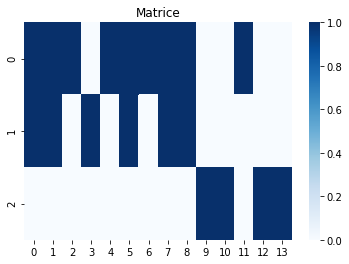

In [19]:
def heatmap(X, title='Matrice'):
    sns.heatmap(X.todense(), cmap="Blues", vmin=0, vmax=1).set_title(title)

heatmap(vector)

## TF_IDF

Le but de l'utilisation de tf-idf est de réduire l'impact des termes qui apparaissent très fréquemment dans un corpus donné et qui sont donc moins informatifs que les autres termes dans le corpus d'apprentissage. 

CountVectorizer, en prenant en compte l'occurrence des mots, est souvent trop limité. Une alternative est d'utiliser la 
mesure TF-IDF (Term Frequency – Inverse Document) qui a pour but de réduire l'impact des termes qui apparaissent très fréquemment dans un corpus donné :  

$
 tf$-$idf(d, t) = tf(t) * idf(d, t)
$  

où $tf(t)$= la fréquence du terme, i.e. le nombre de fois où le terme apparaît dans le document  
et $idf(d, t)$ = la fréquence du document, i.e. le nombre de documents 'd' qui contiennent le terme 't'. 

Le principe est le même que pour CountVectorizer, cette opération se fait par :
1. Création d'une instance de la classe TfidfVectorizer.
1. Appel de la fonction fit() pour apprendre le vocabulaire.
1. Appel de la fonction transform() sur un ou plusieurs documents afin de les encoder dans le vecteur.  

Les paramètres sont assez similaires à ceux de CountVectorizer, voir https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html


,CountVectorizer for,This is,an example,another example,creating vector,example of,for creating,is an,is another,of CountVectorizer,or without,with or,without parameters
0,0.385323,0.293048,0.385323,0.00000,0.385323,0.293048,0.385323,0.385323,0.00000,0.293048,0.00000,0.00000,0.00000
1,0.000000,0.393511,0.000000,0.51742,0.000000,0.393511,0.000000,0.000000,0.51742,0.393511,0.00000,0.00000,0.00000
2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.57735,0.57735,0.57735


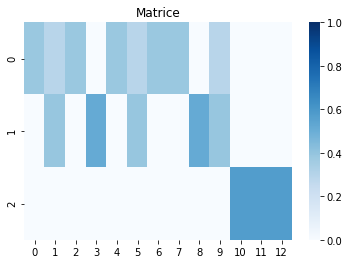

In [25]:
def get_df_vector(data,vectorizer='tfidf', lowercase=False,n_gram=(2,2), min_df=0.01, max_df=0.9):
    if vectorizer == 'tfidf':
        vectorizer = TfidfVectorizer(
            lowercase=lowercase,
            ngram_range=n_gram,
            #tokenizer= lambda x:x,
            preprocessor=lambda x:x,
            min_df=min_df, 
            max_df=max_df)
    elif vetorizer == 'count':
        vectorizer = CountVectorizer(
            lowercase=lowercase,
            preprocessor=lambda x: x,
            #tokenizer=lambda x: x,
            ngram_range=n_gram,
            min_df=min_df, 
            max_df=max_df)
    else:
        raise ValueError()
    vector = vectorizer.fit_transform(texte)

    return pd.DataFrame(
        data=vector.toarray(),
        columns=vectorizer.get_feature_names()
    )

display(get_df_vector(texte))